# SIR Model

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.ion()
plt.rcParams['figure.figsize'] = 10, 8


This script will produce a graph that shows the change in the populations of the "susceptible" and "infected" groups.

It has 4 sections:
- Parameter Values
    - we can change the values in this section to reflect our own equations
- Equations
    - this is a function which translates our equations so the computer can calculate the solution for us. 
    - we need to tell it what our equations are by changing the lines that are highlighted in the code.
- Initial Conditions
    - again, these values can be changed by us to explore different model conditions
- Plotting
    - we don't need to change this part - all it does is draw a graph that shows our results.

## Parameter Values

In [6]:
mu = 1      

beta = 0.0001  

omega = 0.0095  

gamma = 0.0001  



## Equations

In [11]:
def f(y, t):
    Si = y[0]
    Ii = y[1]
    Ri = y[2]
    Ni = Si + Ii + Ri
    # the model equations (we can change the three lines below to fit our equations)
    f0 = (mu * Ni) - (beta * Si * Ii) - (mu * Si) + (omega * Ri)
    f1 = (beta * Si * Ii) - (mu * Ii) - (gamma * Ii)
    f2 = (gamma * Ii) - (mu * Ri) - (omega * Ri)
    return [f0, f1, f2]

## Initial Conditions

In [28]:

S0 = 500.              

I0 = 100                

R0 = 10                 


y0 = [S0, I0, R0]     # initial condition vector

t  = np.linspace(0, 5., 1000)         # time that simulation runs for (start, end, number of time points)

In [29]:
##Plotting

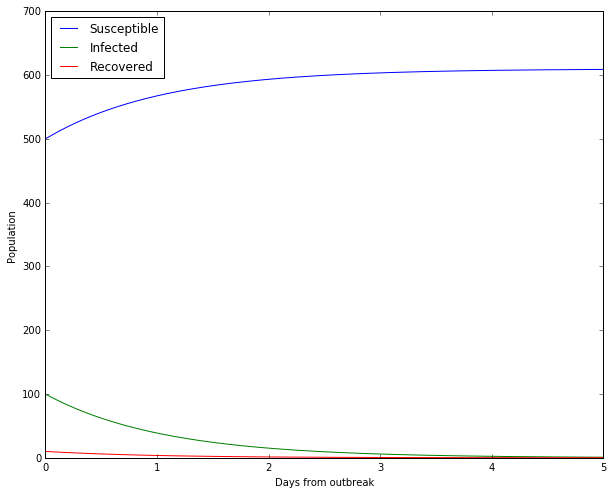

In [30]:
# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
I = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.legend(loc=0)